In [1]:
#SVM활용하여 학업성과예측 모델 구현
# 2018. 6.18 박희순
# 데이터 셋 : 2013년 ~ 2017년 학습데이터 
#gradua,schoarYn,Access,Attend,Activity,LecCnt,StepTime,Homework,mobileRate,PassRate,GrateAvg
#최종학력,경제적 부담,로그인횟수,학습시간,학습활동,총강의갯수,총강의시간,학습활동 개수,모바일사용환경,이수율,평균평점


from sklearn import svm, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
import random, re
from sklearn.metrics import accuracy_score
import numpy
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)



In [3]:
features =14
#filename="./dataset/20200614_v1.csv"
#filename="./dataset/20200717_v1.csv"

features =20
filename="./dataset/20200604_v1.csv"

# 데이터 읽어 들이기--- (※1)
df_pre = pd.read_csv(filename, header=0)
#df_pre=pd.read_csv('./dataset/sjcu_stddata_v11_notitle.csv',encoding="cp949", header=None) # CSV파일을 불러오는 함수를 이용
#df_pre.tail()

print(df_pre.info())


# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:features]
Y = dataset[:,features]
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
#테스트, 검증데이터 분학 7:3 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
X_train, X_test = X_train / 255, X_test / 255

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58088 entries, 0 to 58087
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ci_year              58088 non-null  int64  
 1   ci_term              58088 non-null  int64  
 2   si_grad              58088 non-null  int64  
 3   si_ent_gubun         58088 non-null  int64  
 4   agescale             58088 non-null  int64  
 5   si_sex               58088 non-null  int64  
 6   si_last_hak          58088 non-null  int64  
 7   schoarYn             58088 non-null  int64  
 8   accept_point         58088 non-null  int64  
 9   avg_logincnt         58088 non-null  int64  
 10  avg_att_time         58088 non-null  int64  
 11  avg_att_rate         58088 non-null  float64
 12  avg_bbscnt           58088 non-null  int64  
 13  avg_startlogin       58088 non-null  int64  
 14  entYn                58088 non-null  int64  
 15  classcnt             58088 non-null 

In [4]:
svm_model = svm.SVC(probability=True) #학습시키기
svm_model.fit(X_train, Y_train) #X_train data set , Y_train data set으로 학습

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [5]:
#테스트데이터로 검증
Y_prediction= svm_model.predict(X_test)   #X_test 으로 검증

f_measure = metrics.classification_report(Y_test, Y_prediction)
accuracy = metrics.accuracy_score(Y_test, Y_prediction)

print('Accuracy of SVM Model: %.2f' % accuracy)
print("\r\n",  f_measure)

Accuracy of SVM Model: 0.70

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5229
         1.0       0.70      1.00      0.82     12198

    accuracy                           0.70     17427
   macro avg       0.35      0.50      0.41     17427
weighted avg       0.49      0.70      0.58     17427



C:\Users\hiranMain\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


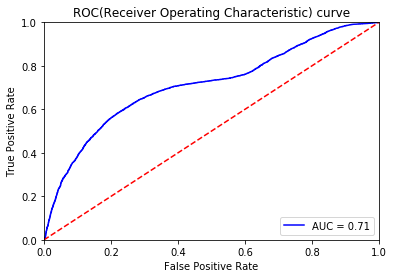

In [7]:
# calculate the fpr and tpr for all thresholds of the classification
probs = svm_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC(Receiver Operating Characteristic) curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()